# What is Deep Learning
https://www.youtube.com/watch?v=FK77zZxaBoI&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU&index=4

Neural network are like human brain. The network is connected by neurons. neurons go from input layer to hidden layers and go to output layer at the end.

###### Keras Sequential Model
* Sequential model is a linear stack of layers
* Dense is the most basic type of layer in neural network that connects each input to each output(for example hidden layer)
* model = Sequential([
    * Dense(32 nodes, input shape = (10,), activation = "relu),  #activation is the nonlinear layer #only the first layer in the sequential shape needs inputshape
    * Dense(2, activation = 'softmax'),
    * ])
* different layers:
    * Dense (or fully connected) layers
    * Covoluntional layers: image data
    * Pooling layers
    * Recurrent layers: time-series data
    * Normalization Layers
    * Many others
    
* input layer: represents different features
    * each input is connected to each single unit in next layer
    * each input connecting to a particular unit in next layer has a weight from 0-1
    * each unit in next layer is an output = activation(weighted sum of inputs)
    * output is the categorical output
    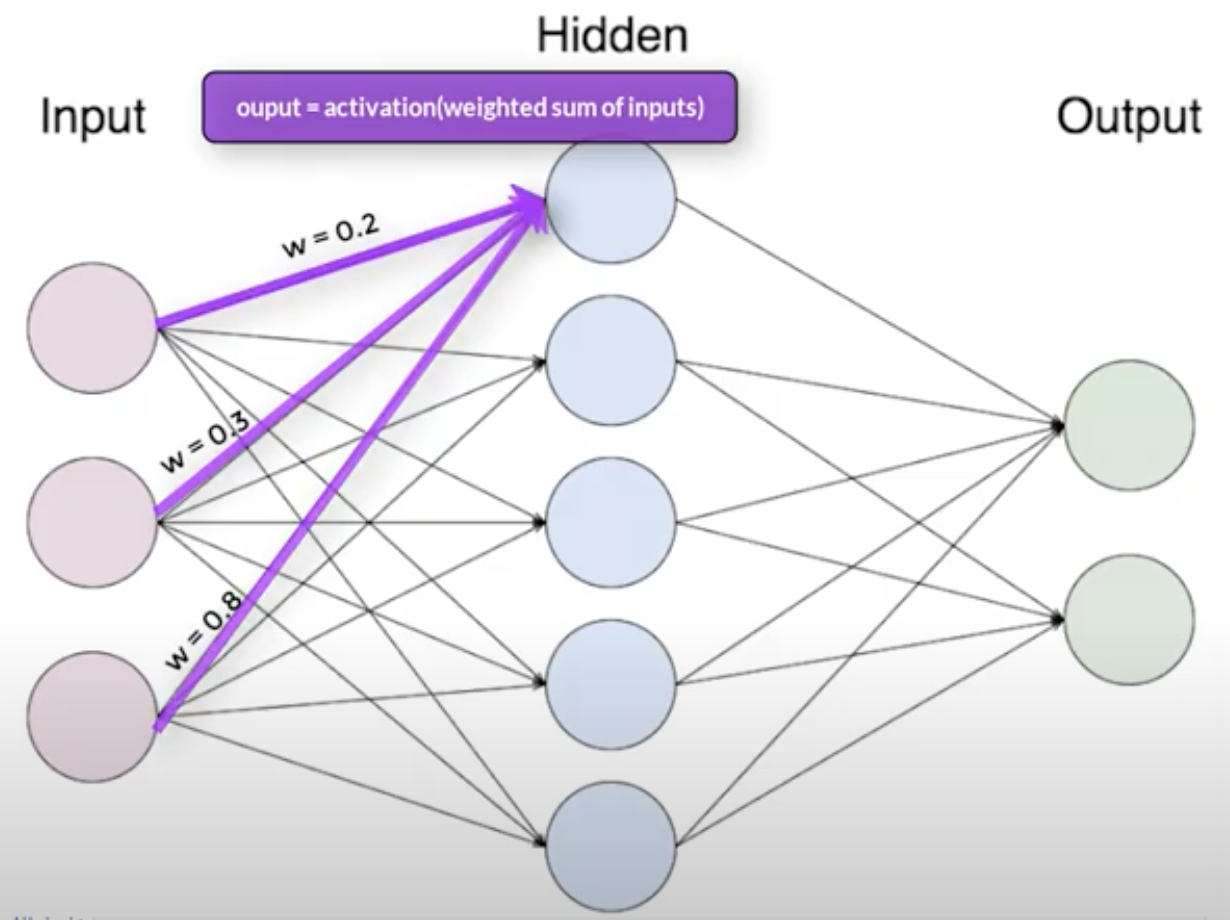

* Activation Function: the activation function of a neuron defines the output of a neuron given a set of inputs
    * activation function that uses sigmoid function: when the input is very negative -> output is 0; if input is close to 0, output is 0.5; if input very large -> output is 1
        * sigmoid activation function: if a neuron is activated, the number is close to 1; the less activated a neuron is, the number is closer to 0
        * "relu" activation function will transfer the input to either 0 or the input itself
        * there are a lot others
        
       

###### Training
* solving an optimization problem: weights will be updating to reach an optimized value using an optimizer
    * an widely known optimizer is Stochastic Gradient Descent(SGD). The objective is to minimize the loss function
    * through constantly passing the training data, the model will learn from the loss function(error) and trying to minimize it, while adjusting the weights
    * pass date through the network once is epoche
    * During eacj epochs, if the loss function is MSE.( squared (the difference between the predicted probability and the ylabel) + ...) /n

###### Learning
gd * learning rate -> until each weight reaching optimzed value to minimize loss

model.compile(Adam(lr=0.0001),loss = , metrics=['accuracy'])
#optimzer and learning rate,loss function

model.fit(training sample, train labels, batch_size = how many input to put, epochs = how many times the data is passed, boolean shuffle = randomize or not,verbose = how many output )

# Get Started in Deep Learing with Keras 

https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

TensorFlow 
- is a open-source deep learning framework developed by Google.
- tf.keras API can be used to Tensorflow project. The focus is on research, flexibility and speed, but hard to use.

Keras 
- is an open-source deep learning library in Python. A standalone open source project. It is clean and simple. It allows flexibility on backend such as TensorFlow etc. 

tf.keras:
- TensorFlow 2 integrated Keras API -> tf.keras interface or API
- tf.keras allows design, fit, evaluate, and use deep learning models to make predictions by using classification and regression predictive modeling.

In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.Sequential()

## Deep Learning Model Life-Cycle

1. Define the model
* Select the model and choose the architecture or network topology
    * defining the layers of the model, configure each layer each a number of nodes and activation function, and connecting the layers together into a cohesive model
* API perspective: Models can be defined either with the Sequential API or Functional API
    
    #define the model
    model = ....
    
    
    
2. Compile the model
* Select a loss function that you want to optimize, such as mean squared error or cross entropy
* Select a algorithm to perform the optimization procedure: suchas stochastic gradient descent, or a modern variation, such as Adam. 
* Select performance metrics to keep track of during the model training process
* API perspective: calling a function to compile the model with the chosen configuration, which prepare the data strucutre for the model
    * the optimizer can be specificed as a strong for a known optimizer class: "sgd" for stochastic gradient descent
    
* Three most common loss functions are:
    binary_crossentropy for binary classification
    sparse_categorical_croassentropy for multi-class classification
    mse(mean squared error) for regression
    
    #compile the model
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])



3. Fit the model
* Select the training configuration, such as the number of epochs and the batch size. 
* use the optimization algorithm to minimize the chosen loss function and updates the model using the backpropagation of error algorithm
* this can take hours to days, depending on the complexity of the model, hardware and dataset size
* API: calling a function to perform the training process.

        #fit the model
        model.fit(X,y, ephochs = 100, batch_size = 32)
        
4. Evaluate the model
* choose a testing dataset to evaluate the model
* API: calling a function with the testing dataset and getting a loss and other metrics that can be reported

    #evalute the model
    loss = model.evaluate(X,y,verbose = 0)
    
    
    
5. Make the prediction
* have the new datato get the targeted values
* API: calling a function to make a prediction of a class label, probability or numerical value

        #make a prediction
        yhat = model.predict(X)


#### Sequential Model API (Simple)
* This is the simplest API to get started. 
    * sequential: define Sequential class and add layers to the model one by one in a linear manner from input to output

In [3]:
#model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#define the model
model = Sequential() #sequential mlp model
#add layers
model.add(Dense(10,input_shape = (8,))) #eight inputs, one hidden layer with 10 nodes
model.add(Dense(1)) #an output layer with one node to predict a numerical value

#### Functional Model API (Advanced)
* more complex and more flexible
* connecting output of one layer to the input of another layer

In [4]:
#first, an input layer must be defined via input and the shape of an input sample is specified
#Next, a fully connected layer can be connected to the input by calling the layer and passing the input layer.This will return a reference to the output connection in this new layer.

# example of a model defined with the functional api
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

## How to Develop Deep Learning Models

Standard deep learning models: Multilayer Perceptrons (MLP), Convolutional Neural Networks (CNNs), and Recurrent Neural Networks (RNNs).

* 3.1 MLP
    * standard fully connected neural network model
        * layers of nodes where each node is connected to all outputs from the previous layer and the output of each node is connected to all inputs for nodes in the next layer
    * MLP is created by one or more Dense layers. This is appropriate for tabular data(excel).
    * Three predictive modeling problems: binary classification, multiclass classification, and regression.
    

#### MLP for Binary Classification
* Encode the string labels to integer values 0 and 1. 
* fit on 67 percent of the data, and the remaining 33 percent will be used for evaluation, split using the train_test_split() function.

In [5]:
! pip install sklearn

In [6]:
# mlp for binary classification
import pandas, sklearn
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [7]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)

In [8]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.948
Predicted: 0.993


#### MLP for multiclass classification
Given that it is a multiclass classification, the model must have one node for each class in the output layer and use the softmax activation function. The loss function is the ‘sparse_categorical_crossentropy‘, which is appropriate for integer encoded class labels (e.g. 0 for one class, 1 for the next class, etc.)

In [9]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.880
Predicted: [[9.8910320e-01 1.0896592e-02 1.8373223e-07]] (class=0)


#### MLP for Regression
This problem involves predicting house value based on properties of the house and neighborhood. This is a regression problem that involves predicting a single numerical value. As such, the output layer has a single node and uses the default or linear activation function (no activation function). The mean squared error (mse) loss is minimized when fitting the model.

In [10]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(339, 13) (167, 13) (339,) (167,)
MSE: 92.919, RMSE: 9.639
Predicted: 24.485


## 3.2 Develop Convolutional Neural Network Models
Convolutional Neural Networks, or CNNs for short, are a type of network designed for image input.

They are comprised of models with convolutional layers that extract features (called feature maps) and pooling layers that distill features down to the most salient elements.

11493376/11490434 [==============================] - 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


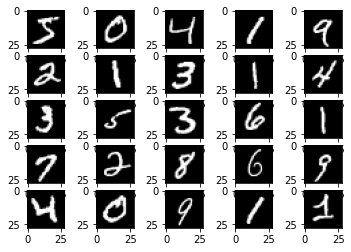

In [12]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

#### 3.3 Develop Recurrent Neural Network Models

They have proven to be very effective for natural language processing problems where sequences of text are provided as input to the model. RNNs have also seen some modest success for time series forecasting and speech recognition.

The most popular type of RNN is the Long Short-Term Memory network, or LSTM for short. LSTMs can be used in a model to accept a sequence of input data and make a prediction, such as assign a class label or predict a numerical value like the next value or values in the sequence.

We will use the car sales dataset to demonstrate an LSTM RNN for univariate time series forecasting.

This problem involves predicting the number of car sales per month.

In [14]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)
# retrieve the values
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

(91, 5, 1) (12, 5, 1) (91,) (12,)
Train on 91 samples, validate on 12 samples
Epoch 1/350
91/91 - 4s - loss: 395324583.7363 - mae: 17814.9180 - val_loss: 202929280.0000 - val_mae: 11367.4990
Epoch 2/350
91/91 - 0s - loss: 65311176.1758 - mae: 6257.0830 - val_loss: 79270112.0000 - val_mae: 6556.6484
Epoch 3/350
91/91 - 0s - loss: 83672197.1868 - mae: 7771.1138 - val_loss: 138758288.0000 - val_mae: 10206.2266
Epoch 4/350
91/91 - 0s - loss: 85946547.3407 - mae: 8241.9971 - val_loss: 79486816.0000 - val_mae: 7587.4570
Epoch 5/350
91/91 - 0s - loss: 42198385.5824 - mae: 5412.8940 - val_loss: 27056128.0000 - val_mae: 3818.6218
Epoch 6/350
91/91 - 0s - loss: 17980876.2637 - mae: 3312.9470 - val_loss: 19871464.0000 - val_mae: 3866.5315
Epoch 7/350
91/91 - 0s - loss: 20844749.8681 - mae: 3736.3962 - val_loss: 33105936.0000 - val_mae: 5166.5254
Epoch 8/350
91/91 - 0s - loss: 24987631.8901 - mae: 4125.8491 - val_loss: 26936274.0000 - val_mae: 4752.3364
Epoch 9/350
91/91 - 0s - loss: 24209858.8791

91/91 - 0s - loss: 7509853.4505 - mae: 2063.2375 - val_loss: 7461029.5000 - val_mae: 2265.6438
Epoch 76/350
91/91 - 0s - loss: 7163345.0165 - mae: 1962.4972 - val_loss: 7411908.0000 - val_mae: 2221.7732
Epoch 77/350
91/91 - 0s - loss: 6989816.2363 - mae: 1934.7504 - val_loss: 6222254.5000 - val_mae: 2098.3960
Epoch 78/350
91/91 - 0s - loss: 6858415.4286 - mae: 1942.4189 - val_loss: 6018625.5000 - val_mae: 1898.2626
Epoch 79/350
91/91 - 0s - loss: 8148342.6154 - mae: 2097.2161 - val_loss: 12852284.0000 - val_mae: 2523.0579
Epoch 80/350
91/91 - 0s - loss: 8463635.5495 - mae: 2201.6814 - val_loss: 15199380.0000 - val_mae: 3172.1465
Epoch 81/350
91/91 - 0s - loss: 9945141.5934 - mae: 2365.9348 - val_loss: 14818529.0000 - val_mae: 3288.6775
Epoch 82/350
91/91 - 0s - loss: 10839943.4286 - mae: 2505.2271 - val_loss: 16967644.0000 - val_mae: 3520.0574
Epoch 83/350
91/91 - 0s - loss: 10836863.9670 - mae: 2518.5854 - val_loss: 12648683.0000 - val_mae: 3113.8074
Epoch 84/350
91/91 - 0s - loss: 13

Epoch 150/350
91/91 - 0s - loss: 8662527.2637 - mae: 2390.1729 - val_loss: 13182053.0000 - val_mae: 3079.1541
Epoch 151/350
91/91 - 0s - loss: 8526500.6154 - mae: 2348.4143 - val_loss: 12568765.0000 - val_mae: 2995.4307
Epoch 152/350
91/91 - 0s - loss: 8254534.9890 - mae: 2306.4563 - val_loss: 12437697.0000 - val_mae: 3007.9265
Epoch 153/350
91/91 - 0s - loss: 9418982.0330 - mae: 2523.0056 - val_loss: 12981013.0000 - val_mae: 2956.7122
Epoch 154/350
91/91 - 0s - loss: 9636937.4505 - mae: 2451.4460 - val_loss: 13419493.0000 - val_mae: 3210.5576
Epoch 155/350
91/91 - 0s - loss: 10842761.5495 - mae: 2762.9292 - val_loss: 13182625.0000 - val_mae: 2959.4094
Epoch 156/350
91/91 - 0s - loss: 11042127.2857 - mae: 2643.6714 - val_loss: 12357449.0000 - val_mae: 3043.8035
Epoch 157/350
91/91 - 0s - loss: 10334709.9011 - mae: 2629.8516 - val_loss: 12027909.0000 - val_mae: 3016.9180
Epoch 158/350
91/91 - 0s - loss: 9589074.6813 - mae: 2489.2468 - val_loss: 12619936.0000 - val_mae: 3052.9202
Epoch 1

Epoch 225/350
91/91 - 0s - loss: 6124763.4011 - mae: 1980.5386 - val_loss: 12798309.0000 - val_mae: 2924.3181
Epoch 226/350
91/91 - 0s - loss: 7107692.5000 - mae: 2047.8704 - val_loss: 13755603.0000 - val_mae: 3061.0996
Epoch 227/350
91/91 - 0s - loss: 6972912.1209 - mae: 2069.4739 - val_loss: 10837387.0000 - val_mae: 2715.8689
Epoch 228/350
91/91 - 0s - loss: 5961722.5604 - mae: 1914.4265 - val_loss: 11667520.0000 - val_mae: 2816.3645
Epoch 229/350
91/91 - 0s - loss: 5979431.8681 - mae: 1945.3979 - val_loss: 10585629.0000 - val_mae: 2664.6606
Epoch 230/350
91/91 - 0s - loss: 6055785.8022 - mae: 1931.5398 - val_loss: 11354977.0000 - val_mae: 2763.6912
Epoch 231/350
91/91 - 0s - loss: 5905277.4780 - mae: 1917.4452 - val_loss: 10828014.0000 - val_mae: 2706.1550
Epoch 232/350
91/91 - 0s - loss: 6236719.1703 - mae: 1975.1152 - val_loss: 11280783.0000 - val_mae: 2732.4065
Epoch 233/350
91/91 - 0s - loss: 6132600.4176 - mae: 1942.0288 - val_loss: 10736276.0000 - val_mae: 2703.2673
Epoch 234/

Epoch 300/350
91/91 - 0s - loss: 6135077.2363 - mae: 1986.7115 - val_loss: 11398095.0000 - val_mae: 2825.2422
Epoch 301/350
91/91 - 0s - loss: 6360489.4396 - mae: 1977.3657 - val_loss: 10807252.0000 - val_mae: 2791.0254
Epoch 302/350
91/91 - 0s - loss: 7114581.3297 - mae: 2115.5352 - val_loss: 12092291.0000 - val_mae: 2907.5886
Epoch 303/350
91/91 - 0s - loss: 5424740.2033 - mae: 1846.8409 - val_loss: 10978295.0000 - val_mae: 2822.0886
Epoch 304/350
91/91 - 0s - loss: 7104492.1978 - mae: 2083.1721 - val_loss: 13895035.0000 - val_mae: 3123.1711
Epoch 305/350
91/91 - 0s - loss: 6167138.7912 - mae: 1930.7021 - val_loss: 10845673.0000 - val_mae: 2835.0159
Epoch 306/350
91/91 - 0s - loss: 6431365.0769 - mae: 2037.4451 - val_loss: 12854243.0000 - val_mae: 3013.2170
Epoch 307/350
91/91 - 0s - loss: 5280295.3736 - mae: 1805.4165 - val_loss: 10785485.0000 - val_mae: 2824.0774
Epoch 308/350
91/91 - 0s - loss: 5509716.9780 - mae: 1808.0608 - val_loss: 13159243.0000 - val_mae: 3052.0125
Epoch 309/

## 4. How to Use Advanced Model Features
## 5. How to Get Better Model Performance
A big part of improving deep learning performance involves avoiding overfitting by slowing down the learning process or stopping the learning process at the right time.

#### 5.1 How to Reduce Overfitting With Dropout

Dropout is a clever regularization method that reduces overfitting of the training dataset and makes the model more robust.here some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look like – and be treated like – a layer with a different number of nodes and connectivity to the prior layer.

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

# Classifying image practice

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Using TensorFlow backend.


In [9]:
#load a default dataset in keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_classification = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(x_train.shape)

(50000, 32, 32, 3)


[6]
airplane


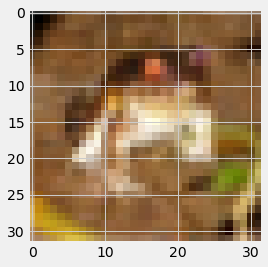

In [10]:
#first image exploration
index = 0
x_train[index] #this is the array data
img = plt.imshow(x_train[index]) 
print(y_train[index]) #this is the y label
print(y_classification[index])

In [11]:
# data preprocessing
y_train_one_hot = to_categorical(y_train)#one hot encoding y categorical varaible
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot)
x_train = x_train/225 #normalizing x variables
x_test = x_test/225 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
#model creation
model = Sequential()